In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction import text

In [2]:
#Read the data file
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)

### Basic Feature Extraction for Review Text.

First, I clean the data removing the NaN values and save as 'rev_new'.

In [3]:
#Filter out data removing the NaN values
rev_new = rev[rev['Review Text'].notnull()]

Here, we calculate the number of characters in each review text.

In [4]:
#Find the length of characters of review text. This also includes spaces
rev_new['char_length_RT'] = rev_new['Review Text'].map(str).apply(len)
print (rev_new.head())

   Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2    

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
rev_new.tail(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,char_length_RT
23475,1104,41,Cute dress,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,153
23476,522,27,Cheeky!,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim,112
23477,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses,500
23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses,229
23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts,500
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,131
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,223
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,208
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,427
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,110


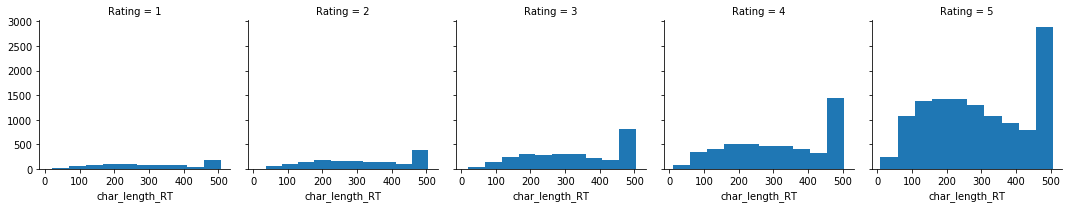

In [5]:
g = sns.FacetGrid(rev_new, col="Rating")
ax =g.map(plt.hist, 'char_length_RT')

#To save the figure
#ax.savefig('Figures/Char_length_RT.png')

#### From this analysis I can understand that the text has limit of 500 character length!


We extract the number of words. 

In [5]:
#Number of word of the Review Text
rev_new['word_count_RT'] = rev_new['Review Text'].apply(lambda x: len(str(x).split(" ")))
rev_new[['Review Text','word_count_RT']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,word_count_RT
0,Absolutely wonderful - silky and sexy and comf...,8
1,Love this dress! it's sooo pretty. i happene...,67
2,I had such high hopes for this dress and reall...,98
3,"I love, love, love this jumpsuit. it's fun, fl...",22
4,This shirt is very flattering to all due to th...,36


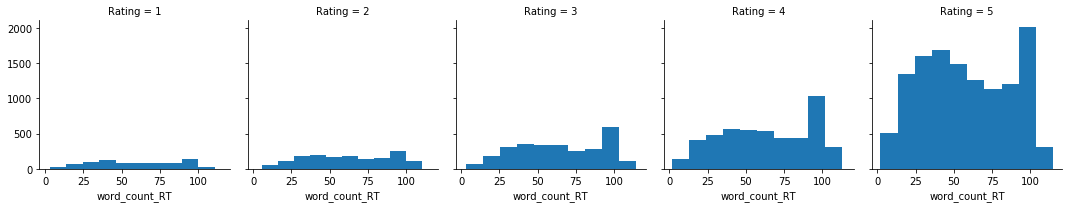

In [7]:
g = sns.FacetGrid(rev_new, col="Rating")
g.map(plt.hist, "word_count_RT")

We will also extract another feature which will calculate the average word length of each review text.

Here, we simply take the sum of the length of all the words and divide it by the total length of the text.

In [6]:
#average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

rev_new['avg_word'] = rev_new['Review Text'].apply(lambda x: avg_word(x))

# Replace all the missing values in the avg_word column with the mean
word_mean = rev_new.avg_word.mean()
rev_new['avg_word'] = rev_new.avg_word.fillna(word_mean)

rev_new[['Review Text','avg_word']].tail(10)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Review Text,avg_word
23475,Cute dress but not for me. the waist is too h...,4.033333
23476,These bottoms are very cute but defiantly chee...,4.650000
23477,I'm so impressed with the beautiful color comb...,4.767442
23478,I was surprised at the positive reviews for th...,4.227273
23479,So i wasn't sure about ordering this skirt bec...,4.164948
23481,I was very happy to snag this dress at such a ...,3.714286
23482,"It reminds me of maternity clothes. soft, stre...",4.894737
23483,"This fit well, but the top was very see throug...",3.976190
23484,I bought this dress for a wedding i have this ...,3.976744
23485,This dress in a lovely platinum is feminine an...,4.842105


In [10]:
rev_new[['char_length_RT', 'word_count_RT']].describe()

,char_length_RT,word_count_RT
count,22641.000000,22641.000000
mean,308.687911,60.214876
std,143.940048,28.503976
min,9.000000,2.000000
25%,186.000000,36.000000
50%,301.000000,59.000000
75%,459.000000,88.000000
max,508.000000,115.000000


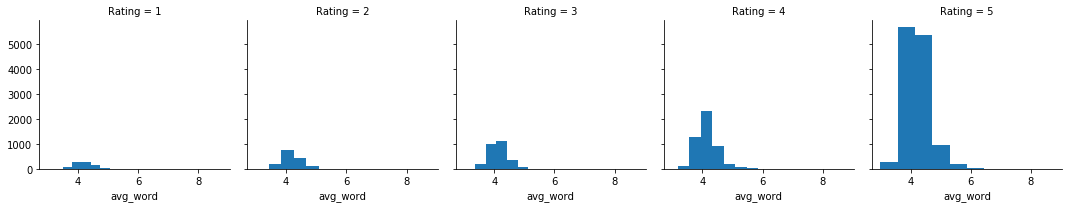

In [9]:
g = sns.FacetGrid(rev_new, col="Rating")
g.map(plt.hist, "avg_word")

We calculate the number of **stopwords** that can give us some extra information.

In [7]:
stop = stopwords.words('english')
rev_new['stopwords_len'] = rev_new['Review Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
rev_new[['Review Text','stopwords_len']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,stopwords_len
0,Absolutely wonderful - silky and sexy and comf...,2
1,Love this dress! it's sooo pretty. i happene...,30
2,I had such high hopes for this dress and reall...,45
3,"I love, love, love this jumpsuit. it's fun, fl...",6
4,This shirt is very flattering to all due to th...,19


In [8]:
# Number of special characters '!'
rev_new['spec_char'] = rev_new['Review Text'].apply(lambda x: len([x for x in x.split() if x.endswith('!')]))
rev_new[['Review Text','spec_char']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,spec_char
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",2
4,This shirt is very flattering to all due to th...,1


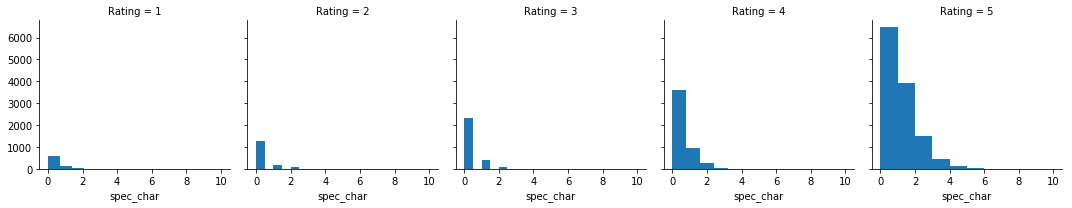

In [12]:
g = sns.FacetGrid(rev_new, col="Rating")
g.map(plt.hist, "spec_char")

As expected, we found more exclamation points ('!') for high Rating (4 and 5) than for low ones.

In [22]:
rev_new_T[['char_length_Title', 'word_count_Title']].describe()

,char_length_Title,word_count_Title
count,19676.000000,19676.000000
mean,19.096768,3.345497
std,9.579297,1.797094
min,2.000000,1.000000
25%,12.000000,2.000000
50%,17.000000,3.000000
75%,24.000000,4.000000
max,52.000000,12.000000


### Basic Pre-processing for Text Review

In [6]:
# Make lowercase
rev_new['RT_new'] = rev_new['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove whitespaces
rev_new['RT_new'] = rev_new['RT_new'].apply(lambda x: " ".join(x.strip() for x in x.split()))
    
# Remove special characters
rev_new['RT_new'] = rev_new['RT_new'].apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
   
#Removing Punctuation
rev_new['RT_new'] = rev_new['RT_new'].str.replace('[^\w\s]','')

# Retain alphabetic words: alpha_only
rev_new['RT_new'] = rev_new['RT_new'].apply(lambda x: " ".join(x for x in x.split() if x.isalpha()))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [7]:
# Remove of Stop Words
stop = text.ENGLISH_STOP_WORDS

rev_new['RT_new'] = rev_new['RT_new'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))

rev_new[['Review Text','RT_new']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Review Text,RT_new
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened store im glad ...
2,I had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ti...
4,This shirt is very flattering to all due to th...,shirt flattering adjustable tie perfect length...


In [11]:
# Convert to string
rev_new['RT_new'] = rev_new['RT_new'].astype(str)

rev_new[['Review Text','RT_new']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,RT_new
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened store im glad ...
2,I had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ti...
4,This shirt is very flattering to all due to th...,shirt flattering adjustable tie perfect length...


### Separate the dataset into 5 groups based on their rating and extract the common words for each groups.

Here, we decide to divide our dataset in 5 groups based on the rating. After that, we calculate the 20 most frequent words for each group and also use the Tf-Idf.

In [8]:
# Write a function to separate a whole dataset into 5 groups based on their ratings 

rev_new_1star = rev_new[rev_new['Rating'] == 1]
rev_new_2star = rev_new[rev_new['Rating'] == 2]
rev_new_3star = rev_new[rev_new['Rating'] == 3]
rev_new_4star = rev_new[rev_new['Rating'] == 4]
rev_new_5star = rev_new[rev_new['Rating'] == 5]

In [14]:
rev_new_1star.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,RT_new
61,368,36,Itchy tags,"3 tags sewn in, 2 small (about 1'' long) and 1...",1,0,0,Initmates,Intimate,Intimates,tags sewn small long huge x itchy cut thread l...
85,866,58,NaN,"I was really hoping to like this, but it did n...",1,0,2,General Petite,Tops,Knits,really hoping like did look way does model sha...
96,845,44,NaN,I usually wear a medium and bought a small. it...,1,0,0,General Petite,Tops,Blouses,usually wear medium bought small fit ok shape ...
97,861,44,Huge,I was very excited to order this top in red xs...,1,0,0,General Petite,Tops,Knits,excited order red xs cute huge shapeless suppo...
110,861,44,Poor quality,This is so thin and poor quality. especially f...,1,0,11,General Petite,Tops,Knits,poor quality especially price felt like pajama...


In [12]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words


In [13]:
# Common words for different "star" rating 

# 1 star 

word_freq_1star= pd.Series(' '.join(preprocessing(rev_new_1star['RT_new'])).split()).value_counts()
top_freq_1star = word_freq_1star[:20]
tot_num_word_1star = len(pd.Series(' '.join(preprocessing(rev_new_1star['RT_new'])).split()))
print (pd.DataFrame({'Word Freq' :top_freq_1star , 'Percentage': (100*(top_freq_1star/tot_num_word_1star))}, columns = ['Word Freq','Percentage']))


# 2 star 

word_freq_2star= pd.Series(' '.join(preprocessing(rev_new_2star['RT_new'])).split()).value_counts()
top_freq_2star = word_freq_2star[:20]
tot_num_word_2star = len(pd.Series(' '.join(preprocessing(rev_new_2star['RT_new'])).split()))
print (pd.DataFrame({'Word Freq' :top_freq_2star , 'Percentage': (100*(top_freq_2star/tot_num_word_2star))}, columns = ['Word Freq','Percentage']))

# 3 star

word_freq_3star= pd.Series(' '.join(preprocessing(rev_new_3star['RT_new'])).split()).value_counts()
top_freq_3star = word_freq_3star[:20]
tot_num_word_3star = len(pd.Series(' '.join(preprocessing(rev_new_3star['RT_new'])).split()))
print (pd.DataFrame({'Word Freq' :top_freq_3star , 'Percentage': (100*(top_freq_3star/tot_num_word_3star))}, columns = ['Word Freq','Percentage']))


# 4 star 

word_freq_4star= pd.Series(' '.join(preprocessing(rev_new_4star['RT_new'])).split()).value_counts()
top_freq_4star = word_freq_4star[:20]
tot_num_word_4star = len(pd.Series(' '.join(preprocessing(rev_new_4star['RT_new'])).split()))
print (pd.DataFrame({'Word Freq' :top_freq_4star , 'Percentage': (100*(top_freq_4star/tot_num_word_4star))}, columns = ['Word Freq','Percentage']))

# 5 star

word_freq_5star= pd.Series(' '.join(preprocessing(rev_new_5star['RT_new'])).split()).value_counts()
top_freq_5star = word_freq_5star[:20]
tot_num_word_5star = len(pd.Series(' '.join(preprocessing(rev_new_5star['RT_new'])).split()))
print (pd.DataFrame({'Word Freq' :top_freq_5star , 'Percentage': (100*(top_freq_5star/tot_num_word_5star))}, columns = ['Word Freq','Percentage']))

              Word Freq  Percentage
dress               375    1.923077
like                351    1.800000
fabric              244    1.251282
fit                 228    1.169231
size                188    0.964103
looks               167    0.856410
small               163    0.835897
ordered             161    0.825641
material            152    0.779487
wear                150    0.769231
shirt               150    0.769231
look                150    0.769231
im                  141    0.723077
really              131    0.671795
looked              130    0.666667
quality             121    0.620513
way                 117    0.600000
retailer            116    0.594872
color               115    0.589744
disappointed        104    0.533333
          Word Freq  Percentage
dress           742    1.922678
like            697    1.806074
size            481    1.246372
fabric          463    1.199731
fit             451    1.168636
look            364    0.943201
love            353 

### TF - IDF 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')   
text_counts = count_vect.fit_transform(rev_new['RT_new'])
feat_name =  count_vect.get_feature_names()
print (text_counts.shape)

(22641, 17938)


In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_counts)
print (text_tfidf.shape)

(22641, 17938)


In [17]:
# Check TF-IDF mean score for whole dataset


# TF-IDF mean score excluding 0s

mean_tfidf_score = np.true_divide(text_tfidf.sum(0),(text_tfidf != 0).sum(0))

#print (mean_tfidf_score)
#print (mean_tfidf_score.shape)
#print (type(mean_tfidf_score))

mean_tfidf_score_list = np.array(mean_tfidf_score)[0].tolist()

# Function to get the maximum tf-idf scores 

def f(a,N):
    return np.argsort(a)[::-1][:N]


max_tfidf_indices_list = f(mean_tfidf_score_list,10)
#print (max_tfidf_indices_list)


#for i in range(len(max_tfidf_indices_list)):
#    print ("The tf_idf mean score is:" , mean_tfidf_score_list[max_tfidf_indices_list[i]], "and the word is:" , feat_name[max_tfidf_indices_list[i]]  )
    

# TF-IDF mean score including 0s

mean_tfidf_score_with0s = np.mean(text_tfidf , axis=0)

mean_tfidf_score_with0s_list = np.array(mean_tfidf_score_with0s)[0].tolist()
max_tfidf_with0s_indices_list = f(mean_tfidf_score_with0s_list,20)

#print (max_tfidf_with0s_indices_list)

#for i in range(len(max_tfidf_with0s_indices_list)):
#    print ("The tf_idf mean score is:" , mean_tfidf_score_with0s_list[max_tfidf_with0s_indices_list[i]], "and the word is:" , feat_name[max_tfidf_with0s_indices_list[i]]  )

In [18]:
# TF-IDF for each rating group

# TF-idf for rating "1 star" 

print ("------ The words with highest TF-IDF scores in 1 star group ------- ")

text_counts_1star = count_vect.fit_transform(rev_new_1star['RT_new'])
feat_name_1star =  count_vect.get_feature_names()
text_tfidf_1star = tfidf_transformer.fit_transform(text_counts_1star)

mean_tfidf_score_1star = np.mean(text_tfidf_1star , axis=0)

mean_tfidf_score_1star_list = np.array(mean_tfidf_score_1star)[0].tolist()
max_tfidf_1star_indices_list = f(mean_tfidf_score_1star_list,20)

for i in range(len(max_tfidf_1star_indices_list)):
    print ( feat_name_1star[max_tfidf_1star_indices_list[i]], mean_tfidf_score_1star_list[max_tfidf_1star_indices_list[i]] )

#print (max_tfidf_1star_indices_list)

#for i in range(len(max_tfidf_1star_indices_list)):
#    print ("The index is:" , max_tfidf_1star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_1star_list[max_tfidf_1star_indices_list[i]], "and the word is:" , feat_name_1star[max_tfidf_1star_indices_list[i]]  )
    
# TF-idf for rating "2 star" 

print ("------ The words with highest TF-IDF scores in 2 star group ------- ")

text_counts_2star = count_vect.fit_transform(rev_new_2star['RT_new'])
feat_name_2star =  count_vect.get_feature_names()
text_tfidf_2star = tfidf_transformer.fit_transform(text_counts_2star)

mean_tfidf_score_2star = np.mean(text_tfidf_2star , axis=0)

mean_tfidf_score_2star_list = np.array(mean_tfidf_score_2star)[0].tolist()
max_tfidf_2star_indices_list = f(mean_tfidf_score_2star_list,20)

#print (max_tfidf_2star_indices_list)

for i in range(len(max_tfidf_2star_indices_list)):
    print ( feat_name_2star[max_tfidf_2star_indices_list[i]], mean_tfidf_score_2star_list[max_tfidf_2star_indices_list[i]] )

#    print ("The index is:" , max_tfidf_2star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_2star_list[max_tfidf_2star_indices_list[i]], "and the word is:" , feat_name_2star[max_tfidf_2star_indices_list[i]]  )
    
    
    
    
# TF-idf for rating "3 star" 

print ("------ The words with highest TF-IDF scores in 3 star group ------- ")

text_counts_3star = count_vect.fit_transform(rev_new_3star['RT_new'])
feat_name_3star =  count_vect.get_feature_names()
text_tfidf_3star = tfidf_transformer.fit_transform(text_counts_3star)

mean_tfidf_score_3star = np.mean(text_tfidf_3star , axis=0)

mean_tfidf_score_3star_list = np.array(mean_tfidf_score_3star)[0].tolist()
max_tfidf_3star_indices_list = f(mean_tfidf_score_3star_list,20)

#print (max_tfidf_3star_indices_list)

for i in range(len(max_tfidf_3star_indices_list)):
    print ( feat_name_3star[max_tfidf_3star_indices_list[i]], mean_tfidf_score_3star_list[max_tfidf_3star_indices_list[i]] )
        
 #   print ("The index is:" , max_tfidf_3star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_3star_list[max_tfidf_3star_indices_list[i]], "and the word is:" , feat_name_3star[max_tfidf_3star_indices_list[i]]  )
    
# TF-idf for rating "4 star" 

print ("------ The words with highest TF-IDF scores in 4 star group ------- ")

text_counts_4star = count_vect.fit_transform(rev_new_4star['RT_new'])
feat_name_4star =  count_vect.get_feature_names()
text_tfidf_4star = tfidf_transformer.fit_transform(text_counts_4star)

mean_tfidf_score_4star = np.mean(text_tfidf_4star , axis=0)

mean_tfidf_score_4star_list = np.array(mean_tfidf_score_4star)[0].tolist()
max_tfidf_4star_indices_list = f(mean_tfidf_score_4star_list,20)

#print (max_tfidf_4star_indices_list)

for i in range(len(max_tfidf_4star_indices_list)):
    print ( feat_name_4star[max_tfidf_4star_indices_list[i]], mean_tfidf_score_4star_list[max_tfidf_4star_indices_list[i]] )
    
  #  print ("The index is:" , max_tfidf_4star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_4star_list[max_tfidf_4star_indices_list[i]], "and the word is:" , feat_name_4star[max_tfidf_4star_indices_list[i]]  )

    
# TF-idf for rating "5 star" 

print ("------ The words with highest TF-IDF scores in 5 star group ------- ")

text_counts_5star = count_vect.fit_transform(rev_new_5star['RT_new'])
feat_name_5star =  count_vect.get_feature_names()
text_tfidf_5star = tfidf_transformer.fit_transform(text_counts_5star)

mean_tfidf_score_5star = np.mean(text_tfidf_5star , axis=0)

mean_tfidf_score_5star_list = np.array(mean_tfidf_score_5star)[0].tolist()
max_tfidf_5star_indices_list = f(mean_tfidf_score_5star_list,20)

#print (max_tfidf_5star_indices_list)

for i in range(len(max_tfidf_5star_indices_list)):
    print ( feat_name_5star[max_tfidf_5star_indices_list[i]], mean_tfidf_score_5star_list[max_tfidf_5star_indices_list[i]] )
    
 #   print ("The index is:" , max_tfidf_5star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_5star_list[max_tfidf_5star_indices_list[i]], "and the word is:" , feat_name_5star[max_tfidf_5star_indices_list[i]]  )

------ The words with highest TF-IDF scores in 1 star group ------- 
dress 0.04454828688823852
like 0.036701797002103666
fabric 0.028678786642158494
fit 0.028113956571555083
shirt 0.02549865276776367
size 0.02495884130057343
looks 0.02475306972922989
just 0.0242107534121207
material 0.023637852484084038
small 0.022583666025359776
look 0.021575730884272514
ordered 0.02096045412203474
looked 0.020591016560677185
really 0.020112923404394002
im 0.019848020823661043
wear 0.019760485293370093
quality 0.01928914301505358
cute 0.018143992683106375
way 0.017786728073152076
disappointed 0.01726443003435793
------ The words with highest TF-IDF scores in 2 star group ------- 
dress 0.044624981199543556
like 0.03632986501692314
fabric 0.030286369494974597
size 0.030074901954824755
just 0.028623783619028727
fit 0.028051282939224213
small 0.025082896142968124
look 0.024560176770218753
love 0.02450527918926116
really 0.023707250989309973
ordered 0.02344147900133703
im 0.02288484720830339
shirt 0.02250

## Study the most frequent words divided in 2 groups

Instead, here we divide our dataset in only 2 groups: the highly (>= 3) rating and the low one (<3).

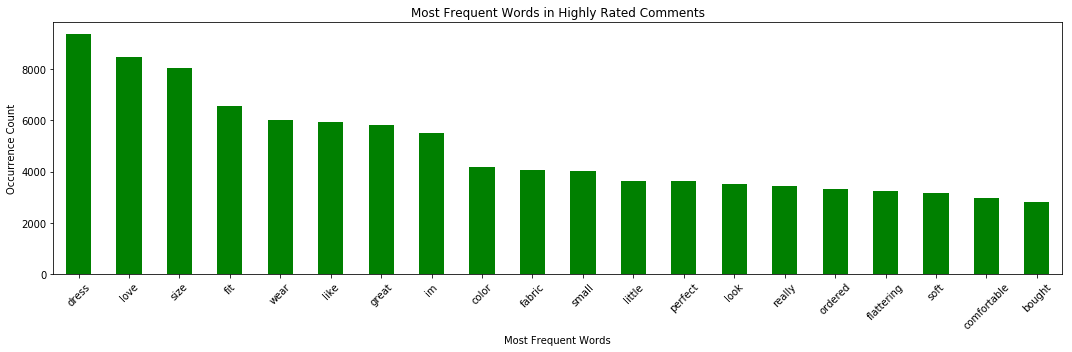

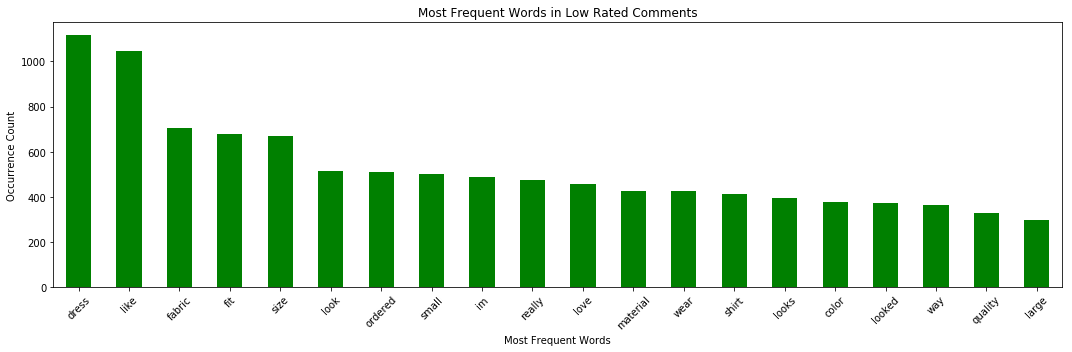

In [19]:
#Study of Most Frequent Words in Highly and Low Rated Comments

#ps = PorterStemmer()

#Tokenization refers to dividing the text into a sequence of words or sentences.

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words


title ='Most Frequent Words in Highly Rated Comments'
temp = rev_new['RT_new'][rev_new.Rating.astype(int) >= 3]

# Bar Chart
ax = wordfreq(preprocessing(temp), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()

#Save figure
#fig = ax.get_figure()
#fig.savefig('Figures/Freq_Rat_high.png')

#Low Raited
title ='Most Frequent Words in Low Rated Comments'
temp_low = rev_new['RT_new'][rev_new.Rating.astype(int) < 3]

# Bar Chart
ax = wordfreq(preprocessing(temp_low), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()

#Save figure
#fig = ax.get_figure()
#fig.savefig('Figures/Freq_Rat_low.png')


## The most common words in general:

We find the most 10 common words used not dividing our dataset, also using the Tf-Idf.

In [20]:
temp = rev_new['RT_new']

# The most common words used
freq_common = pd.Series(' '.join(preprocessing(temp)).split()).value_counts()[:10]
print ('The most common words used:')
print(freq_common)



The most common words used:
dress     10460
love       8916
size       8687
fit        7238
like       6992
wear       6414
great      6076
im         5974
fabric     4755
color      4557
dtype: int64


### Tf-Idf: Text Review.

In [21]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Take the title text
text = rev_new['RT_new']

# Create the vectorizer method
tfidf_vec = TfidfVectorizer(stop_words='english')

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit(text)


# summarize
#print(text_tfidf.vocabulary_)
#print(text_tfidf.idf_)

# encode document
vector = text_tfidf.transform(text) 

# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())


#Print the first 10 words based on tfidf score

indices = np.argsort(tfidf_vec.idf_)[::1]
features = tfidf_vec.get_feature_names()
top_features = [features[i] for i in indices[:10]]
print (top_features)


['love', 'size', 'fit', 'dress', 'like', 'wear', 'great', 'im', 'just', 'fabric']


## Sentiment analysis

We try to understand the customer reviews also study the textual sentiment. 
For the sentiment analysis we extract the polarity: values nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. Also in this case, we divide the polarity in 5 groups.

In [13]:
# Sentiment Analysis

rev_new['sent'] = rev_new['Review Text'].apply(lambda x: pd.Series(TextBlob(x).sentiment.polarity))
rev_new[['Review Text','sent', 'Recommended IND', 'Rating']].head(10)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review Text,sent,Recommended IND,Rating
0,Absolutely wonderful - silky and sexy and comf...,0.633333,1,4
1,Love this dress! it's sooo pretty. i happene...,0.339583,1,5
2,I had such high hopes for this dress and reall...,0.073675,0,3
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,1,5
4,This shirt is very flattering to all due to th...,0.512891,1,5
5,"I love tracy reese dresses, but this one is no...",0.178750,0,2
6,I aded this in my basket at hte last mintue to...,0.133750,1,5
7,"I ordered this in carbon for store pick up, an...",0.171635,1,4
8,I love this dress. i usually get an xs but it ...,0.002500,1,5
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",0.204200,1,5


Recommended IND
0    0.129320
1    0.276479
Name: sent, dtype: float64

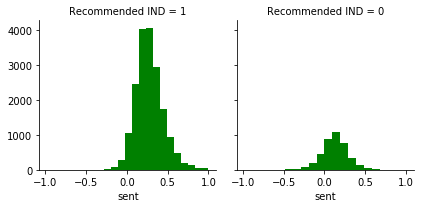

In [42]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
g = sns.FacetGrid(rev_new, col="Recommended IND", col_order=[1, 0])
g = g.map(plt.hist, "sent", bins=20, color="g")

recommend = rev_new.groupby(['Recommended IND'])
recommend['sent'].mean()

From the above graphs, it appears that the reviews left by customers who recommended their product gave more positive reviews (with a mean of 0.28), compared to those who did not recommend (with a mean of 0.13).

In [14]:
# Converting 0 to 1 Decimal Score to a Categorical Variable: 5 groups
rev_new['Sentiment'] = ''
rev_new.loc[rev_new['sent'] > 0.6, 'Sentiment'] = 'Strong Positive'
rev_new.loc[(rev_new['sent'] > 0.2) & (rev_new['sent'] < 0.6), 'Sentiment'] = 'Positive'
rev_new.loc[(rev_new['sent'] < 0.2) & (rev_new['sent'] > -0.2), 'Sentiment'] = 'Neutral'
rev_new.loc[(rev_new['sent'] < -0.2) & (rev_new['sent'] > -0.6), 'Sentiment'] = 'Negative'
rev_new.loc[rev_new['sent'] < -0.6, 'Sentiment'] = 'Strong Negative'

rev_new[['Review Text', 'sent', 'Sentiment', 'Recommended IND', 'Rating']].head(10)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Review Text,sent,Sentiment,Recommended IND,Rating
0,Absolutely wonderful - silky and sexy and comf...,0.633333,Strong Positive,1,4
1,Love this dress! it's sooo pretty. i happene...,0.339583,Positive,1,5
2,I had such high hopes for this dress and reall...,0.073675,Neutral,0,3
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,Positive,1,5
4,This shirt is very flattering to all due to th...,0.512891,Positive,1,5
5,"I love tracy reese dresses, but this one is no...",0.178750,Neutral,0,2
6,I aded this in my basket at hte last mintue to...,0.133750,Neutral,1,5
7,"I ordered this in carbon for store pick up, an...",0.171635,Neutral,1,4
8,I love this dress. i usually get an xs but it ...,0.002500,Neutral,1,5
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",0.204200,Positive,1,5


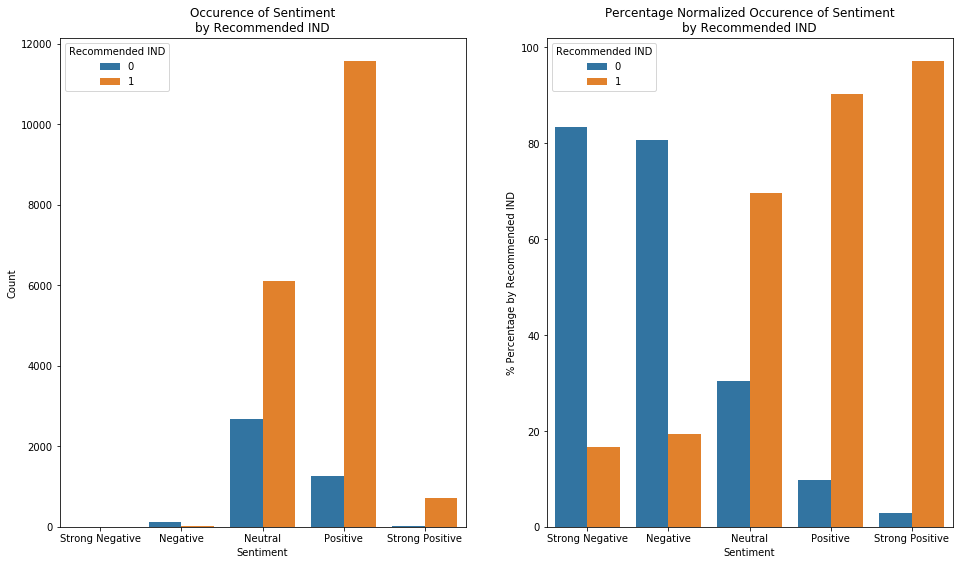

In [10]:
x, hue = "Sentiment", "Recommended IND"


f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new, ax=axes[0], order=["Strong Negative", "Negative","Neutral","Positive", "Strong Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))

sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1], order=["Strong Negative", "Negative","Neutral","Positive", "Strong Positive"])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()


From these plots, as expected, we note that a recommended item indicates clearly a positive sentiment in the review.


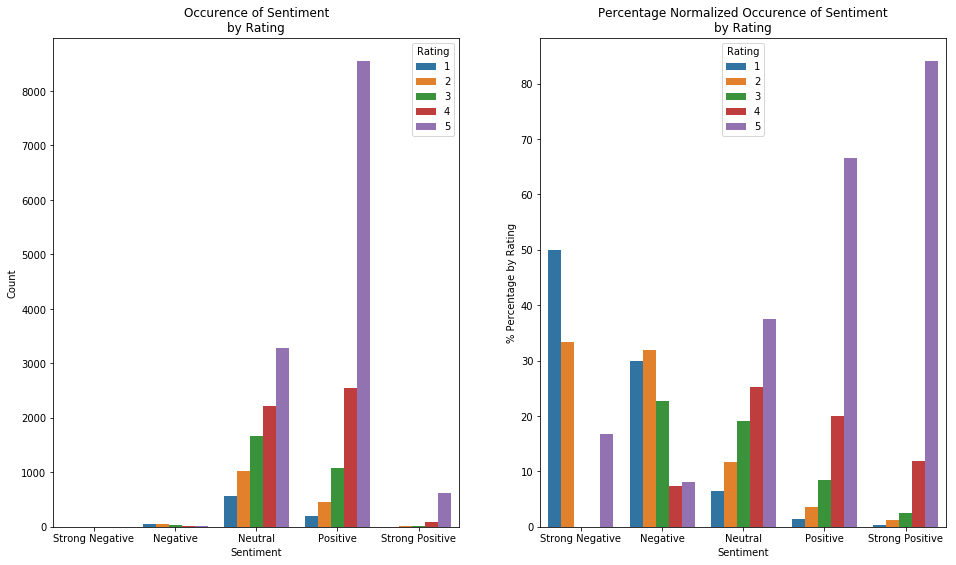

In [11]:
x, hue = "Sentiment", "Rating"

f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new, ax=axes[0], order=["Strong Negative", "Negative","Neutral","Positive", "Strong Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))

sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1], order=["Strong Negative", "Negative","Neutral","Positive", "Strong Positive"])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()

Like the distribution of rating, most reviews have a positive sentiment.
From the second plot, we can notice that, from our division, the distribution for the neutral, positive and strong positive sentiment increasing when the rating number increases. Instead, the negative sentiment, as expected, has more low rating occurence (1 and 2). For the strong negative sentiment, the distribution is particular: has a peak for rating 1 and 2, as expected, but also more or less 15 % of occurence for rating 5.   


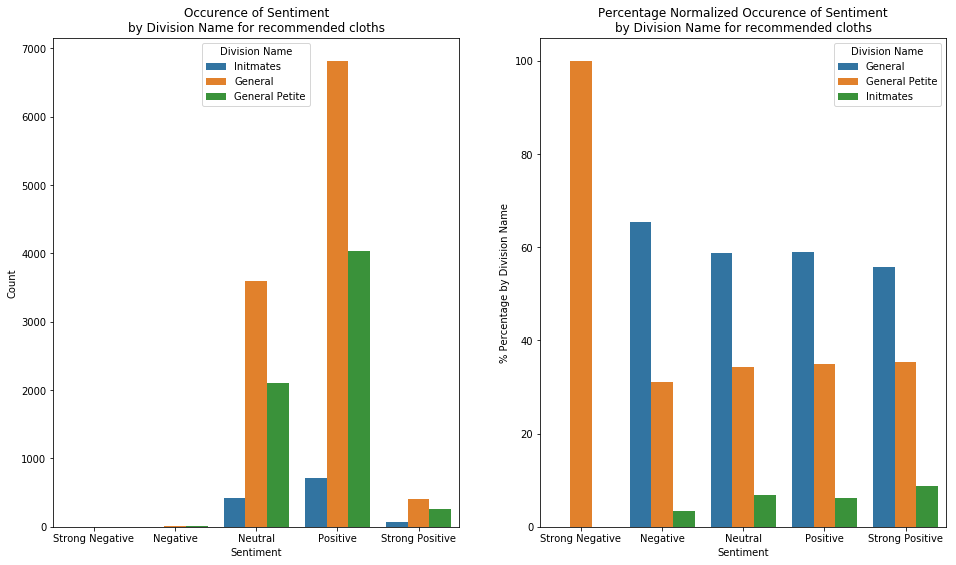

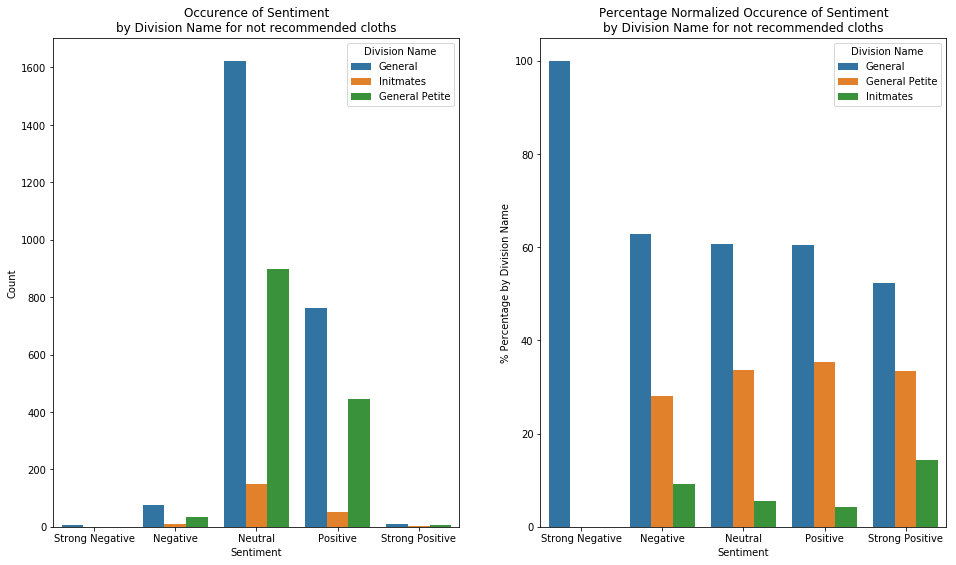

In [8]:
rev_new_rec = rev_new[rev_new['Recommended IND'] == 1]
rev_new_no_rec = rev_new[rev_new['Recommended IND'] == 0]

x, hue = "Sentiment", "Division Name"


f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new_rec, ax=axes[0],order=["Strong Negative", "Negative","Neutral","Positive", "Strong Positive"])
axes[0].set_title("Occurence of {}\nby {} for recommended cloths".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new_rec[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))

sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1], order=["Strong Negative", "Negative","Neutral","Positive", "Strong Positive"])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {} for recommended cloths".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()


f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new_no_rec, ax=axes[0],order=["Strong Negative", "Negative","Neutral","Positive", "Strong Positive"])
axes[0].set_title("Occurence of {}\nby {} for not recommended cloths".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new_no_rec[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))

sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1], order=["Strong Negative", "Negative","Neutral","Positive", "Strong Positive"])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {} for not recommended cloths".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()

Here, we use the same variables, but the upper row is for recommended reviews, while the bottom row is for non-recommended reviews.
From these plots, the 'strong negative' sentiment presents a particular feature: for the recommended reviews only the 'General Petite' is shown, while for the non-recommended only the 'General' Division Name is shown.
Instead, the distribution of division names for the other sentiments does not seem to change depending on status of recommendation.


## Title Analysis

Here, we consider the 'Title' feature.

### Some Basic Feature Extraction for Title.

In [15]:
#Filter out data removing the NaN values
rev_new_T = rev[rev['Title'].notnull()]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


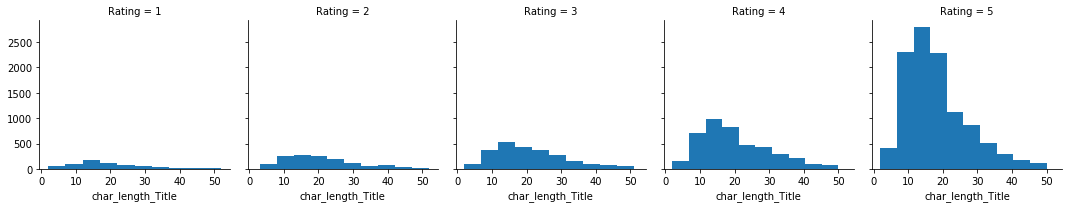

In [16]:
rev_new_T['char_length_Title'] = rev_new_T['Title'].map(str).apply(len)


g = sns.FacetGrid(rev_new_T, col="Rating")
g.map(plt.hist, "char_length_Title")

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                                           Title  char_length_Title  \
2                        Some major design flaws                 23   
3                               My favorite buy!                 16   
4                               Flattering shirt                 16   
5                        Not for the very petite                 23   
6                           Cagrcoal shimmer fun                 20   
7           Shimmer, surprisingly goes with lots                 36   
8                                     Flattering                 10   
9                              Such a fun dress!                 17   
10  Dress looks like it's made of cheap material                 44   
12                                    Perfect!!!                 10   

    word_count_Title  
2                  4  
3                  3  
4                  2  
5                  5  
6                  3  
7                  5  
8                  1  
9                  4  
10         

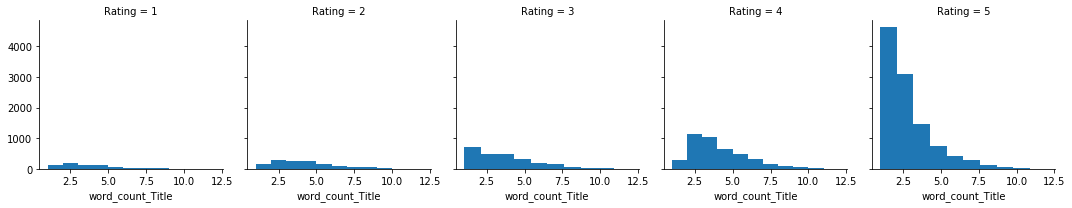

In [17]:
#Number of word of the Title
rev_new_T['word_count_Title'] = rev_new_T['Title'].apply(lambda x: len(str(x).split(" ")))
print (rev_new_T[['Title','char_length_Title', 'word_count_Title']].head(10))

g = sns.FacetGrid(rev_new_T, col="Rating")
g.map(plt.hist, "word_count_Title")

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                     Title  spec_char_Title
2  Some major design flaws                0
3         My favorite buy!                1
4         Flattering shirt                0
5  Not for the very petite                0
6     Cagrcoal shimmer fun                0


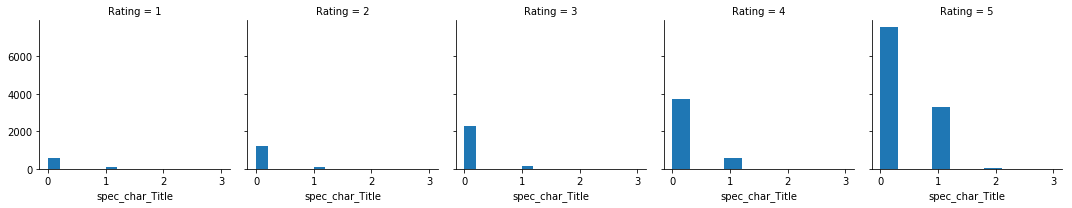

In [18]:
# Number of special characters '!'
rev_new_T['spec_char_Title'] = rev_new_T['Title'].apply(lambda x: len([x for x in x.split() if x.endswith('!')]))
print (rev_new_T[['Title','spec_char_Title']].head())

g = sns.FacetGrid(rev_new_T, col="Rating")
g.map(plt.hist, "spec_char_Title")

Also, for the title, we find more exclamation points for high rating and in particular for rating 5; it means that the exclamation points express enthusiasm.

In [8]:
rev_new_T.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses


### Study the most frequent words in highly and low rated title

Here, we extract the most frequent words for the titles dividing the dataset in two groups: highly rated title (>= 3) and low rated title (< 3).

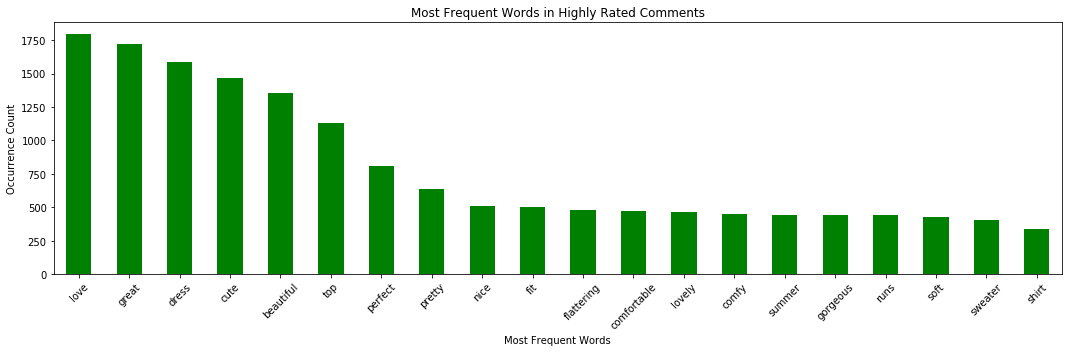

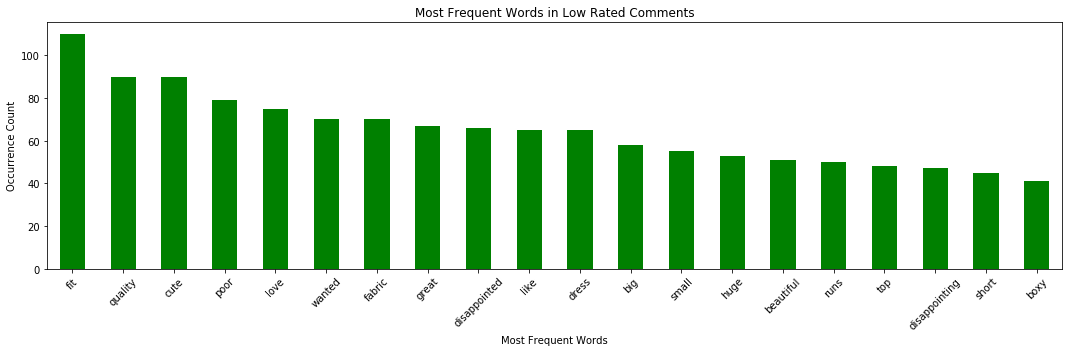

In [22]:
#ps = PorterStemmer()

#Tokenization refers to dividing the text into a sequence of words or sentences.

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words


title ='Most Frequent Words in Highly Rated Titles'
temp = rev_new_T['Title'][rev_new_T.Rating.astype(int) >= 3]

# Bar Chart
ax = wordfreq(preprocessing(temp), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()

#Save figure
#fig = ax.get_figure()
#fig.savefig('Figures/Freq_Rat_high.png')

#Low Raited
title ='Most Frequent Words in Low Rated Titles'
temp_low = rev_new_T['Title'][rev_new_T.Rating.astype(int) < 3]

# Bar Chart
ax = wordfreq(preprocessing(temp_low), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()

#Save figure
#fig = ax.get_figure()
#fig.savefig('Figures/Freq_Rat_low.png')


### Tf-Idf Title

We find the most frequent words in general using the Tf-Idf method. 

In [24]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Take the title text
text = rev_new_T['Title']

# Create the vectorizer method
tfidf_vec = TfidfVectorizer(stop_words='english')

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit(text)


# summarize
#print(text_tfidf.vocabulary_)
#print(text_tfidf.idf_)

# encode document
vector = text_tfidf.transform(text) 

# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())


#Print the first 10 words based on tfidf score

indices = np.argsort(tfidf_vec.idf_)[::1]
features = tfidf_vec.get_feature_names()
top_features = [features[i] for i in indices[:10]]
print (top_features)


['great', 'love', 'dress', 'cute', 'beautiful', 'perfect', 'pretty', 'fit', 'nice', 'flattering']


In [19]:
rev_new.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,char_length_RT,word_count_RT,avg_word,stopwords_len,spec_char,RT_new,sent,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,8,5.750000,2,0,Absolutely wonderful silky and sexy and comfor...,0.633333,Strong Positive
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,67,3.822581,30,1,Love this sooo i happened to find it in a and ...,0.339583,Positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98,4.112245,45,1,I had such high hopes for this dress and reall...,0.073675,Neutral
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,22,4.681818,6,2,I love this and every time i wear i get nothin...,0.550000,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,36,4.361111,19,1,This shirt is very flattering to all due to th...,0.512891,Positive


In [21]:
rev_new_T.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,char_length_Title,word_count_Title,spec_char_Title
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,4,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,3,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,2,0
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,23,5,0
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,20,3,0


In [22]:
#Save the new dataframe as 'Reviews_new.csv'
rev_new.to_csv('Reviews_new.csv')

In [22]:
#Save the new dataframe after the title processing
rev_new_T.to_csv('Review_Title.csv')